## Data set information
#### bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs)
### Attribute Information:

* Input variables:
### bank client data:

*  age (numeric)
*  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
*  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
*  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
*  previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
*  emp.var.rate: employment variation rate - quarterly indicator (numeric)
*  cons.price.idx: consumer price index - monthly indicator (numeric)
*  cons.conf.idx: consumer confidence index - monthly indicator (numeric)
*  euribor3m: euribor 3 month rate - daily indicator (numeric)
*  nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
*  y - has the client subscribed a term deposit? (binary: 'yes','no')




In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('bank.csv',delimiter=';',)

In [4]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Pivot Report using Crosstab

In [7]:
pd.crosstab([df.education,df.marital],[df.y,df.loan],margins=True).style.background_gradient(cmap='summer_r')

In [8]:
df.shape

(45211, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [11]:
# Checking null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
cat_df = df.select_dtypes(exclude=np.number)
cat_df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

## Data Visualization using dtale 

In [13]:
# using dtale
import dtale

In [14]:
d = dtale.show(df)

In [15]:
d

## Data visualization using Profiling 

In [16]:
import pandas_profiling

In [17]:
report = pandas_profiling.ProfileReport(df)

In [18]:
report.to_notebook_iframe()

In [19]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.72. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [20]:
av = AutoViz_Class()

Shape of your Data Set: (45211, 17)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 45211 exceeds maximum, randomly sampling 45000 rows for EDA...
Total Number of Scatter Plots = 28
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 56.539


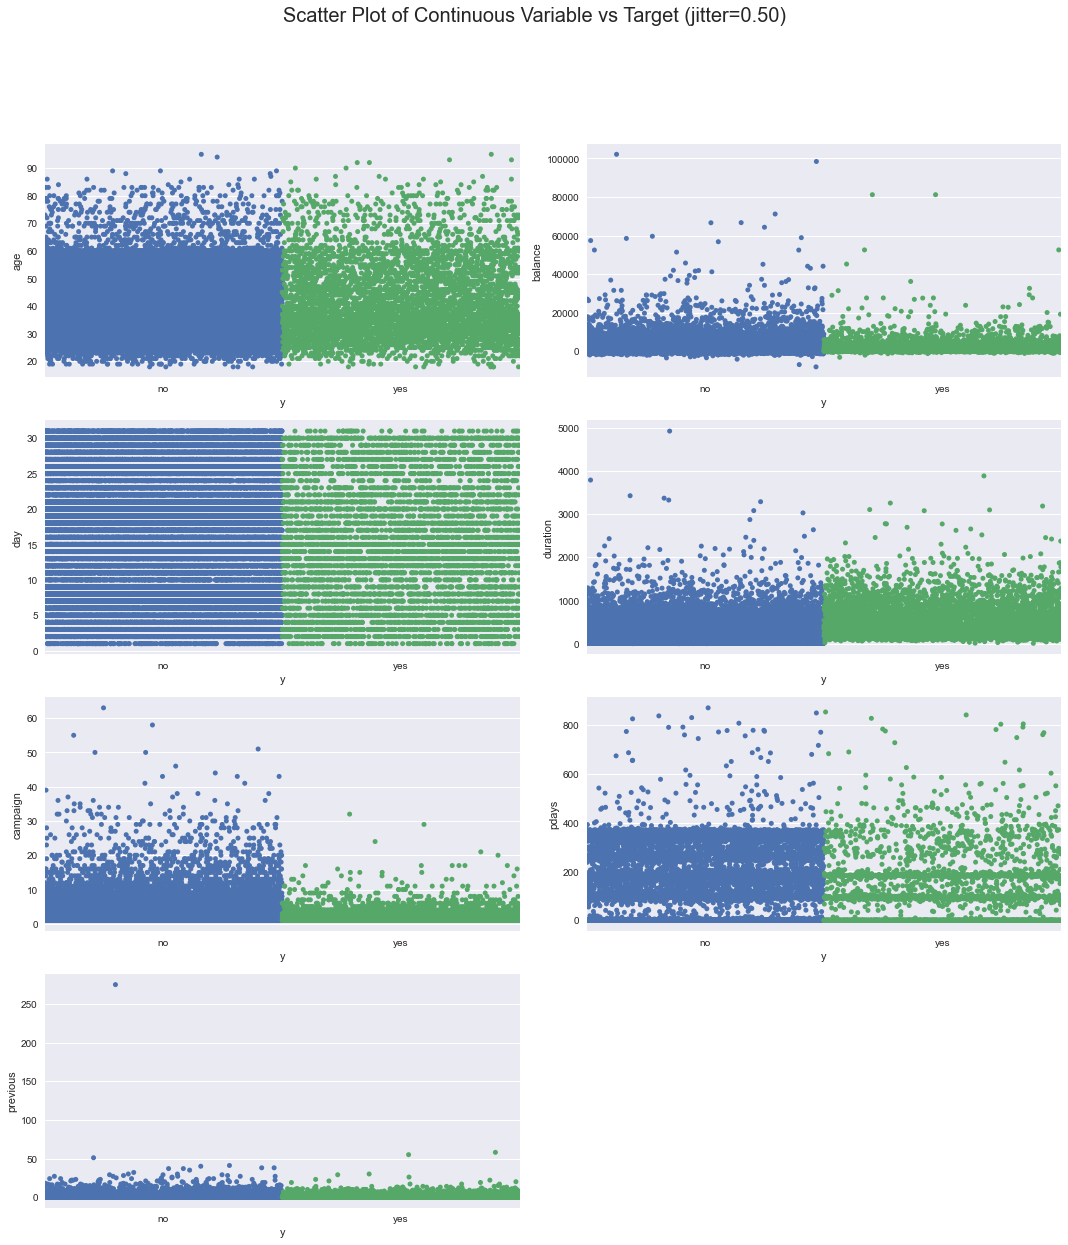

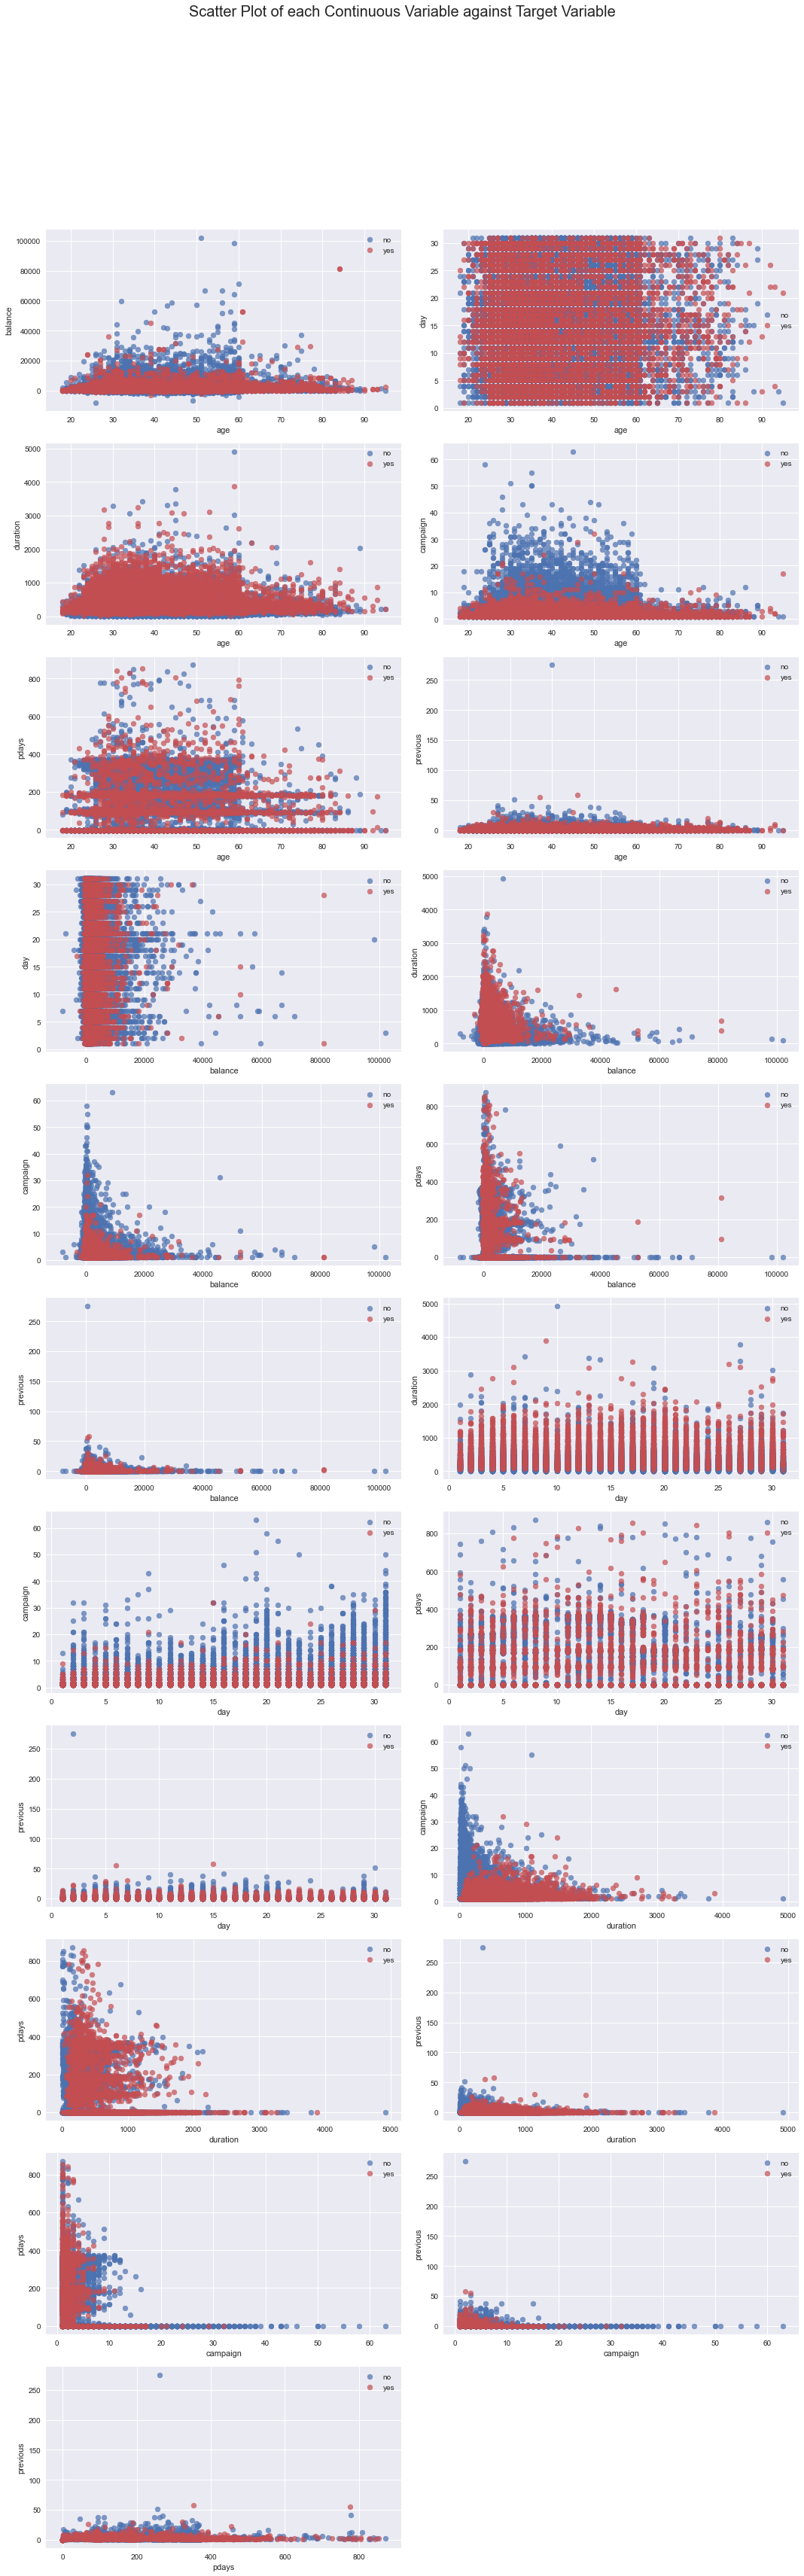

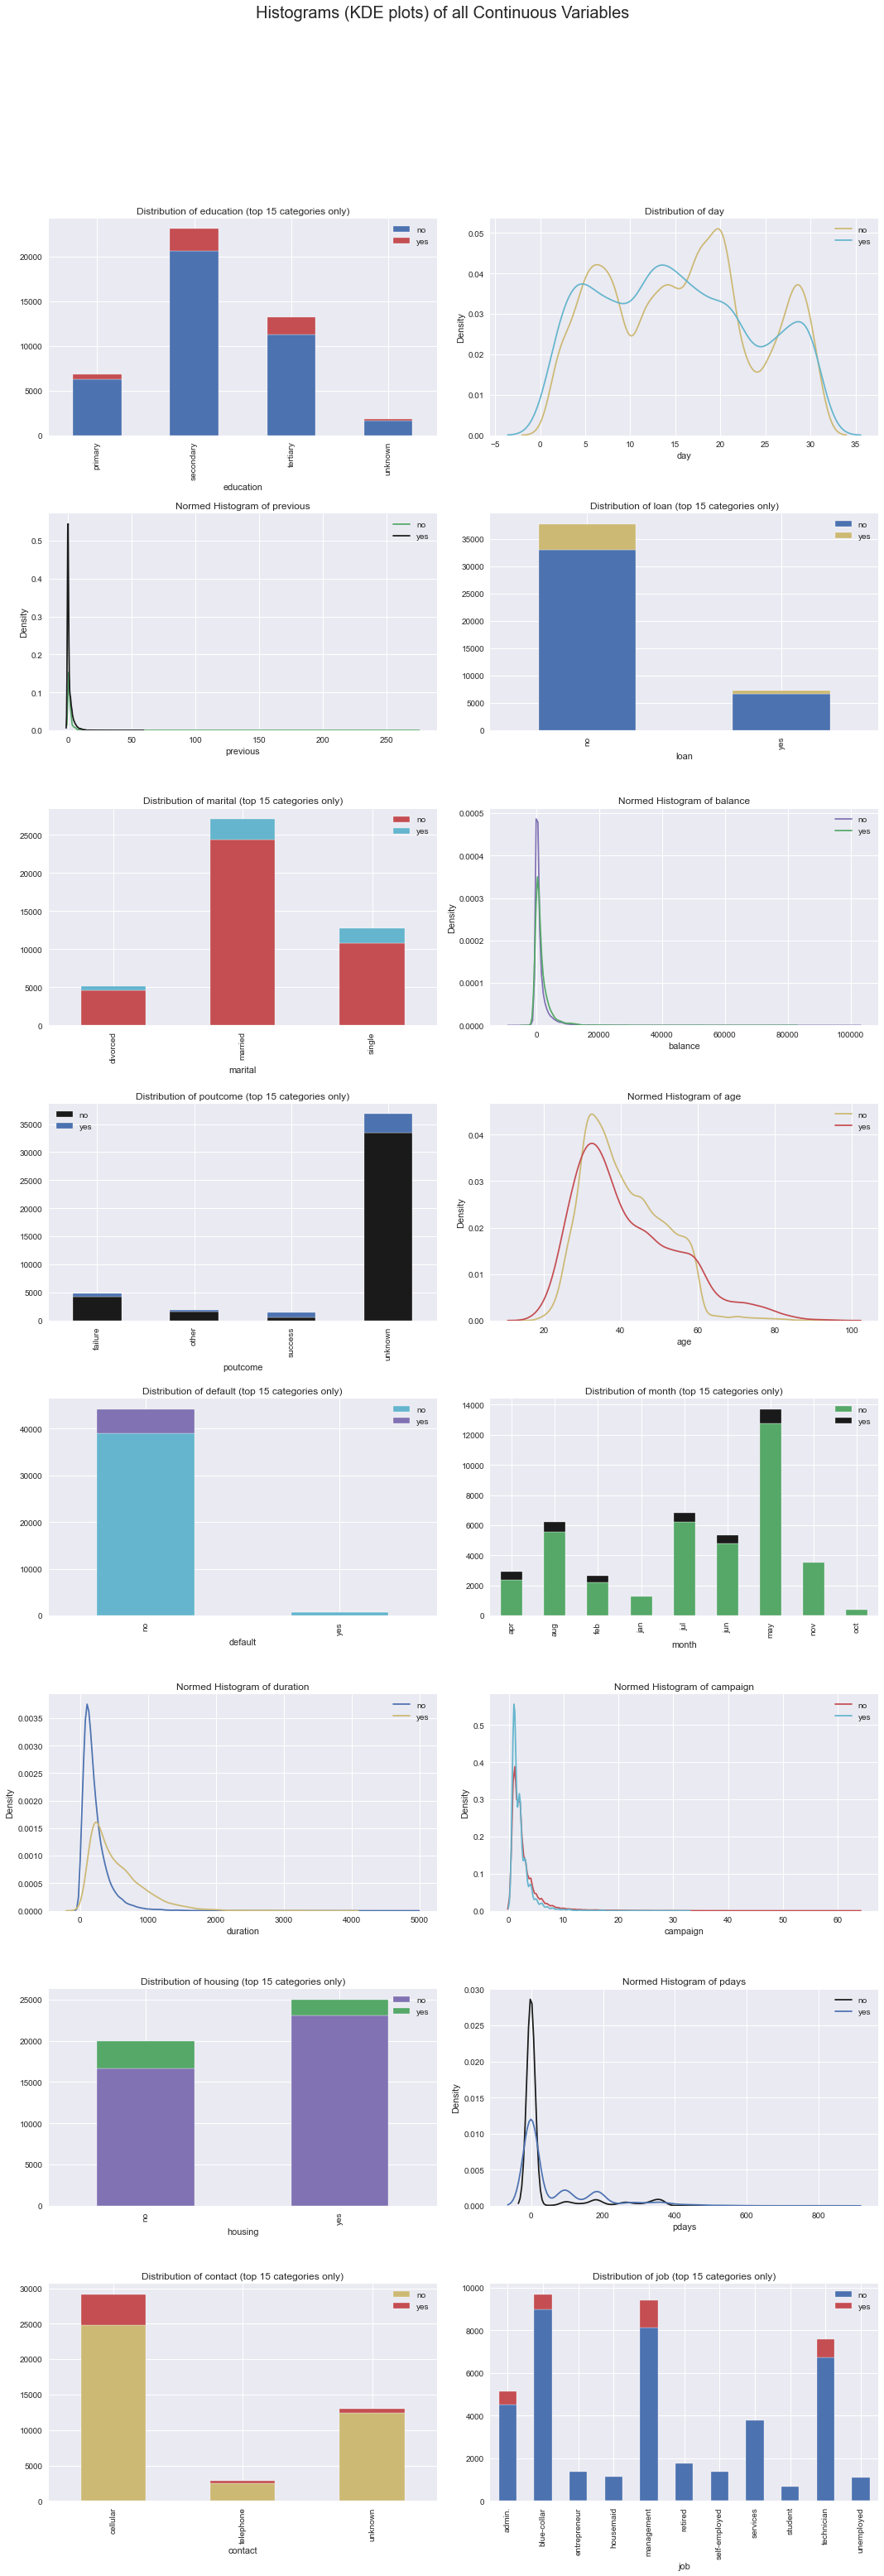

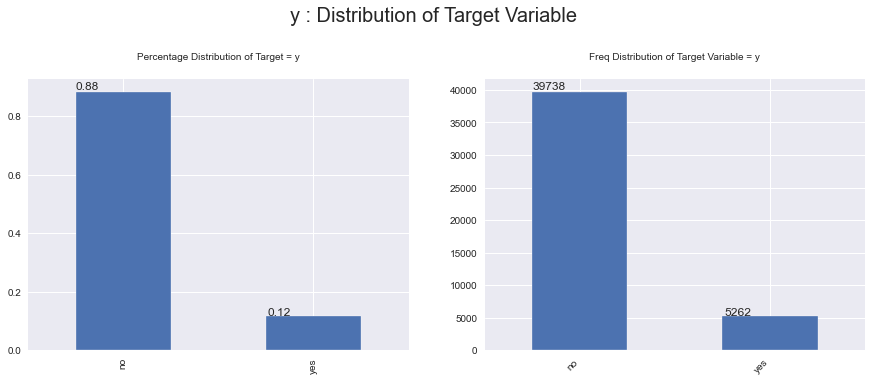

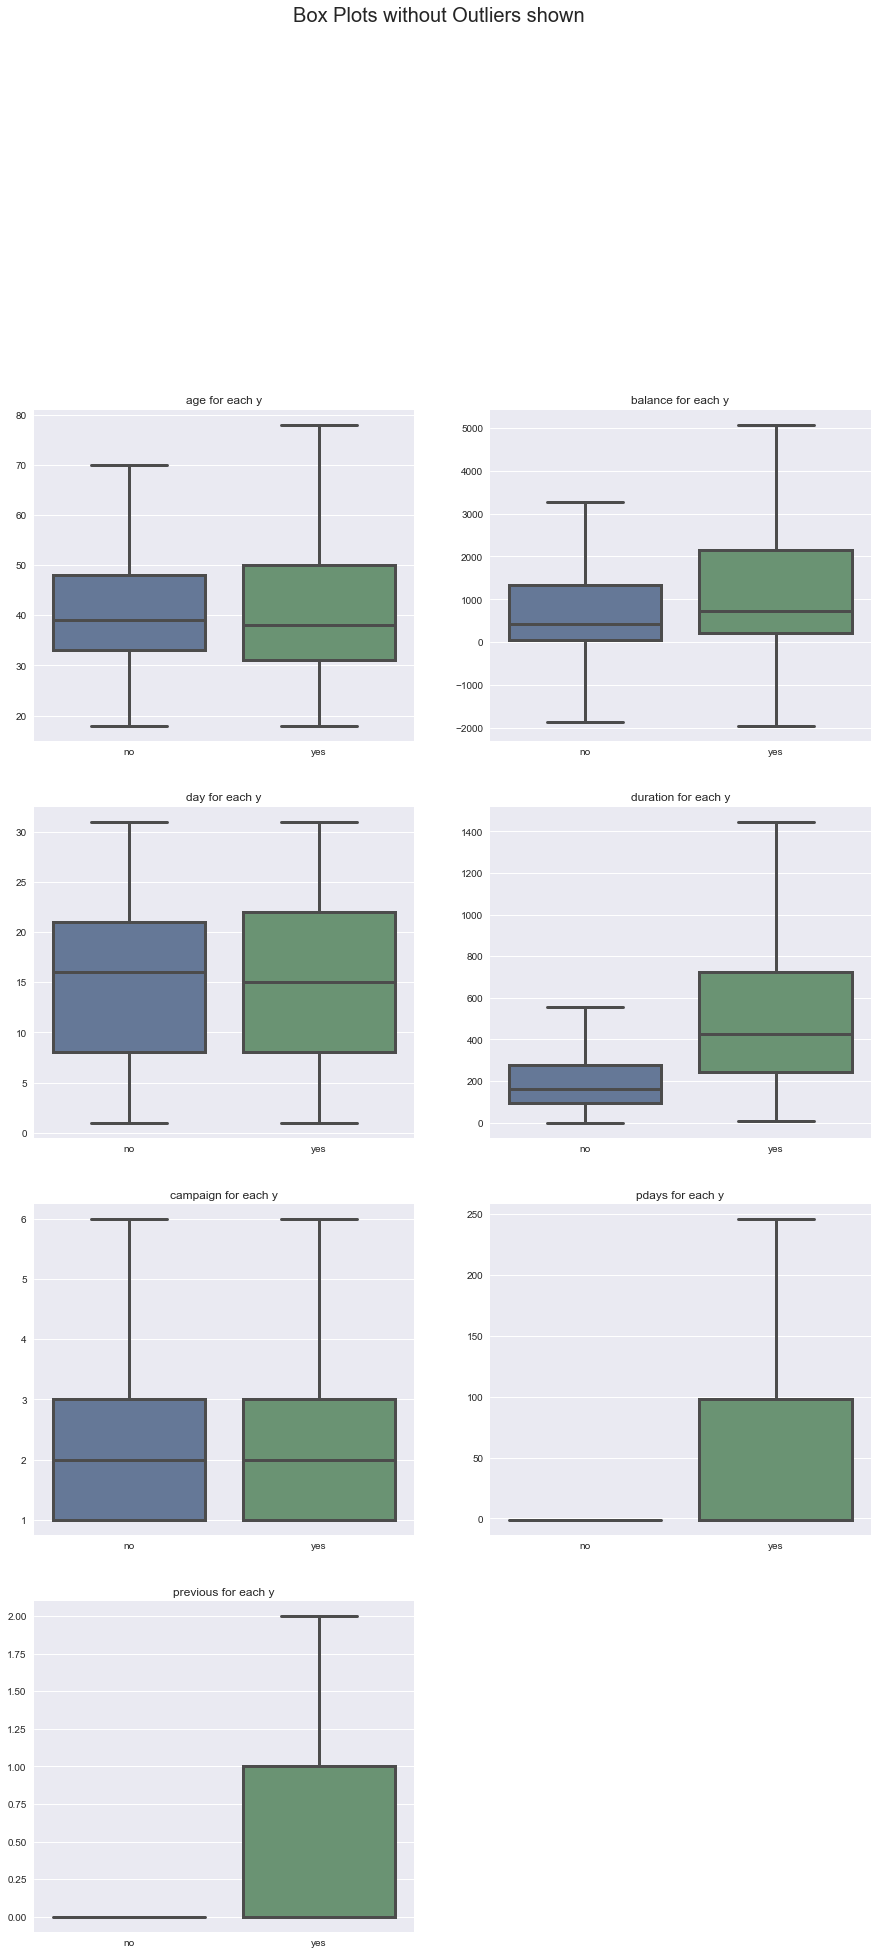

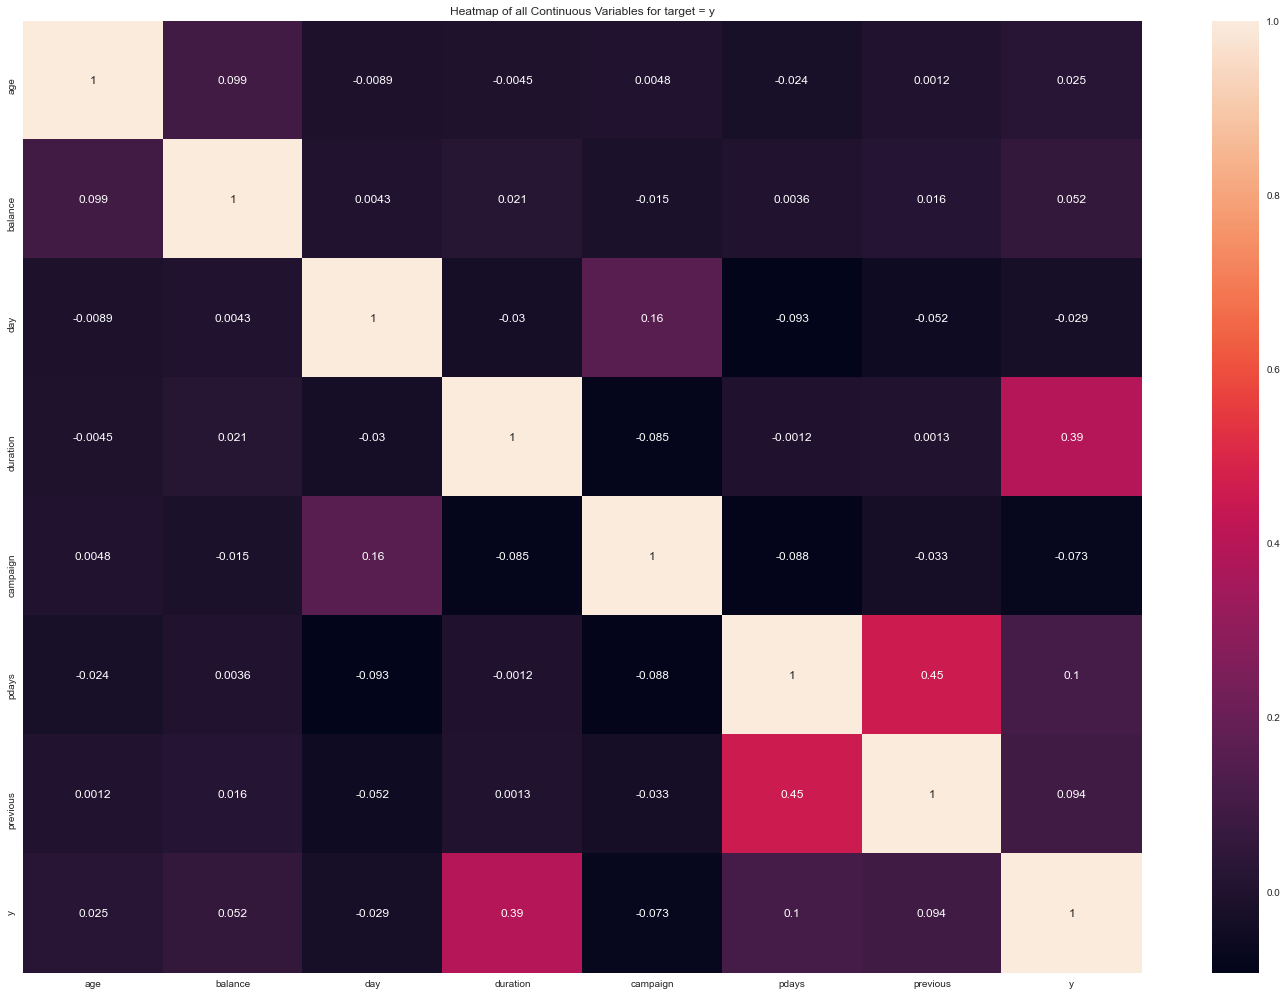

In [21]:
df = av.AutoViz('E:/Datascience/Projects/Bank/bank.csv', sep=';',depVar='y',dfte=None,chart_format='svg',max_rows_analyzed=45000 )

## Data Preprocessing & EDA

## univaraite analysis for categorical features and imbalance check


 ****************************** Plot job ******************************
blue-collar      0.215133
management       0.209311
technician       0.168156
admin.           0.114378
services         0.091756
retired          0.050089
self-employed    0.034778
entrepreneur     0.032933
unemployed       0.028844
housemaid        0.027444
student          0.020778
unknown          0.006400
Name: job, dtype: float64


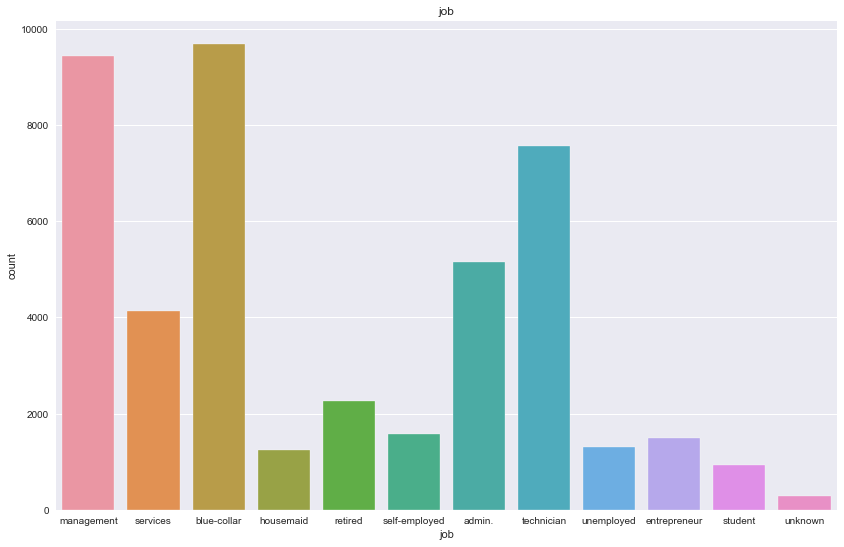


 ****************************** Plot marital ******************************
married     0.602089
single      0.282756
divorced    0.115156
Name: marital, dtype: float64


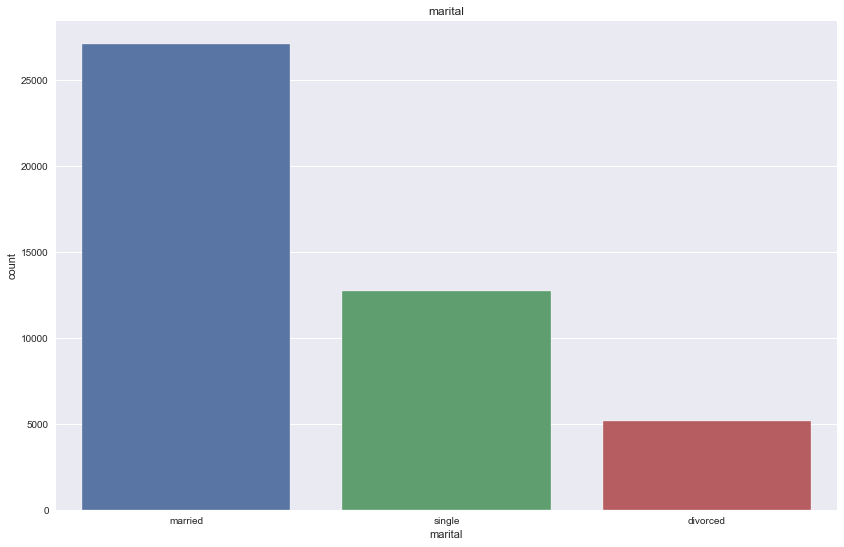


 ****************************** Plot education ******************************
secondary    0.513178
tertiary     0.294267
primary      0.151533
unknown      0.041022
Name: education, dtype: float64


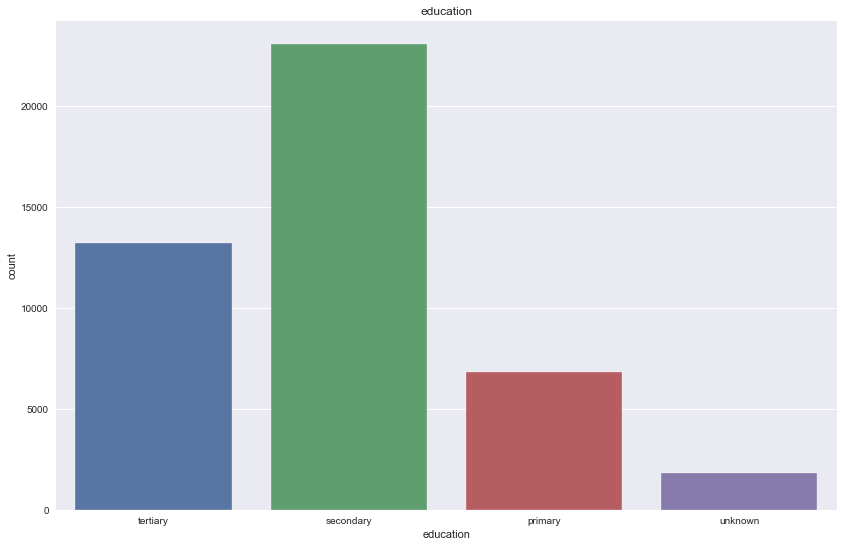


 ****************************** Plot default ******************************
no     0.981889
yes    0.018111
Name: default, dtype: float64


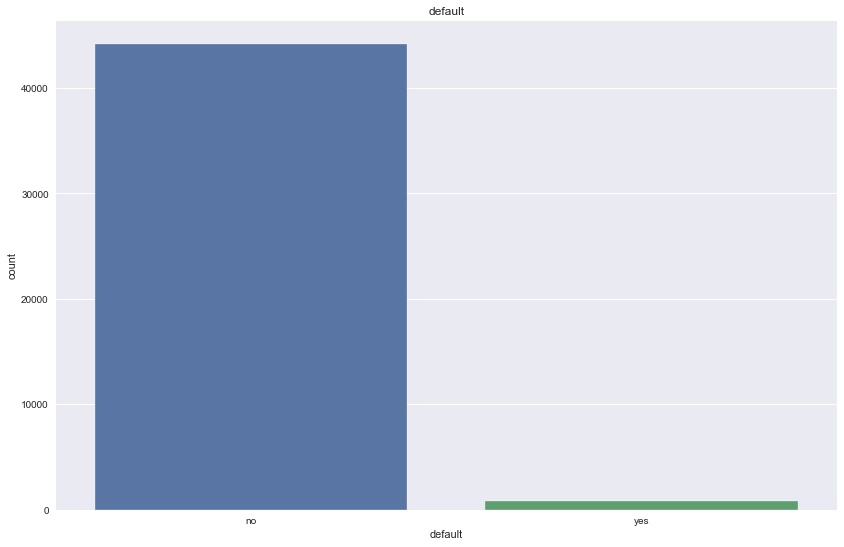


 ****************************** Plot housing ******************************
yes    0.555844
no     0.444156
Name: housing, dtype: float64


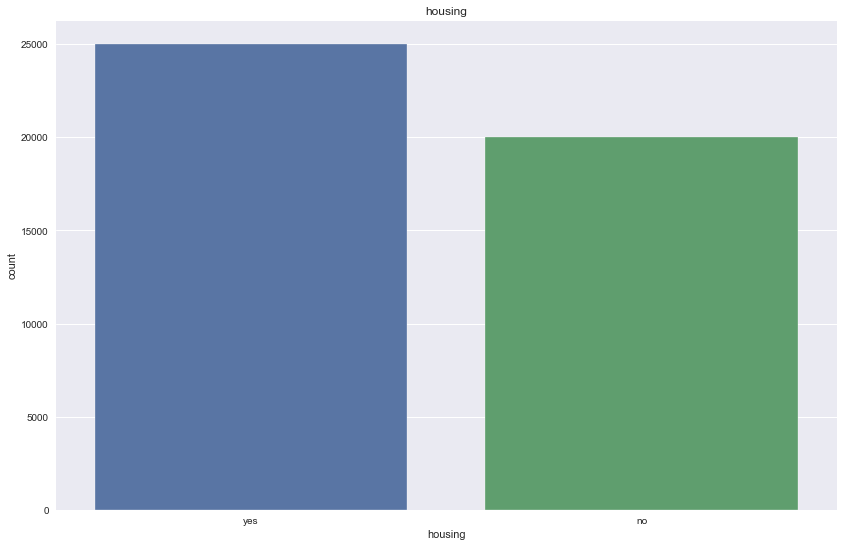


 ****************************** Plot loan ******************************
no     0.8398
yes    0.1602
Name: loan, dtype: float64


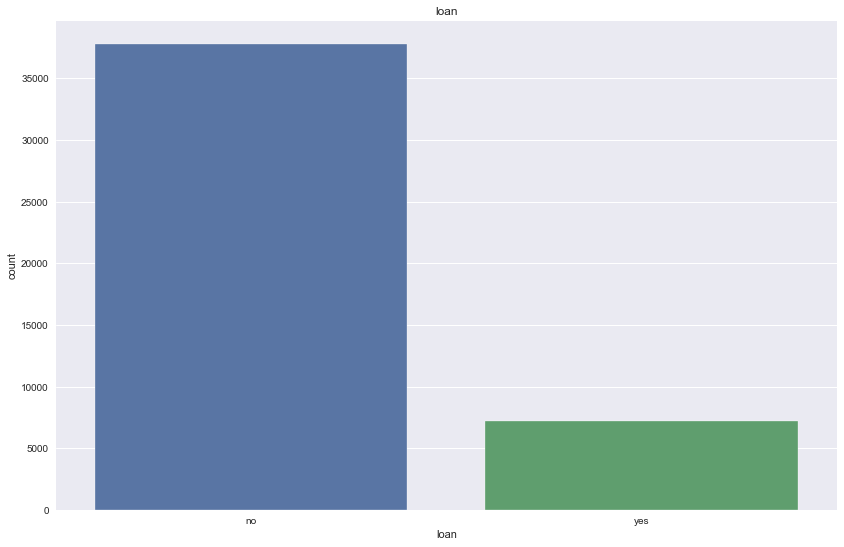


 ****************************** Plot contact ******************************
cellular     0.647667
unknown      0.288111
telephone    0.064222
Name: contact, dtype: float64


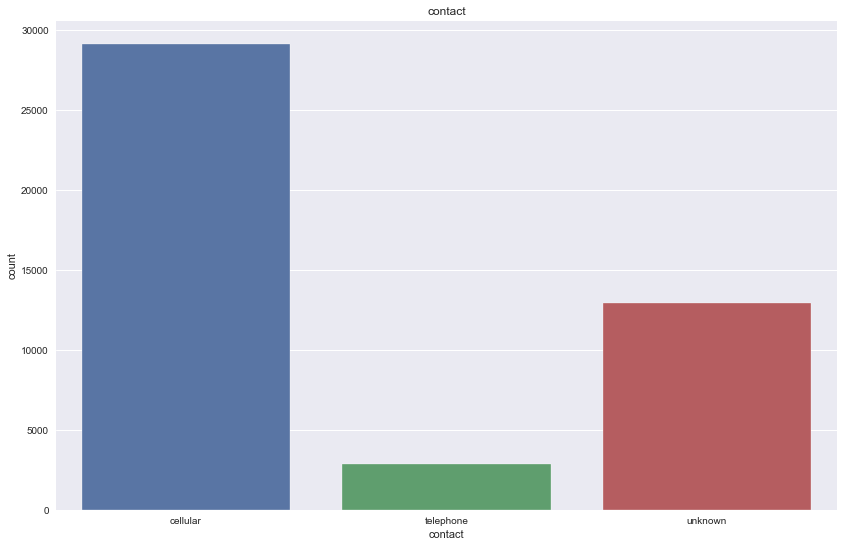


 ****************************** Plot month ******************************
may    0.304556
jul    0.152178
aug    0.138178
jun    0.118244
nov    0.087867
apr    0.064844
feb    0.058689
jan    0.031022
oct    0.016378
sep    0.012822
mar    0.010533
dec    0.004689
Name: month, dtype: float64


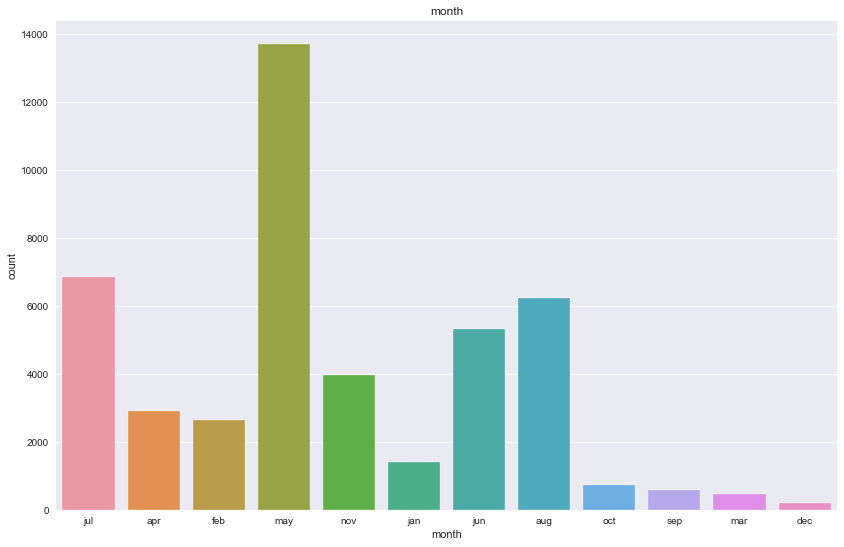


 ****************************** Plot poutcome ******************************
unknown    0.817556
failure    0.108444
other      0.040600
success    0.033400
Name: poutcome, dtype: float64


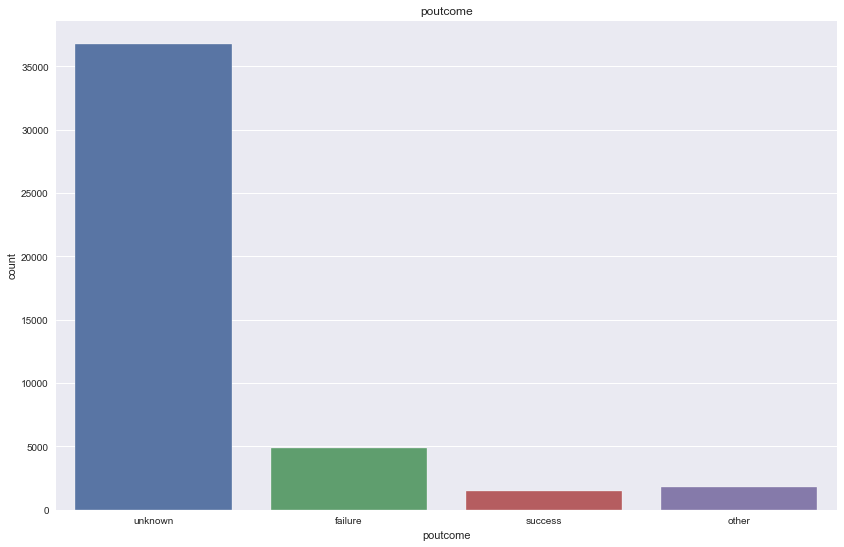


 ****************************** Plot y ******************************
no     0.883067
yes    0.116933
Name: y, dtype: float64


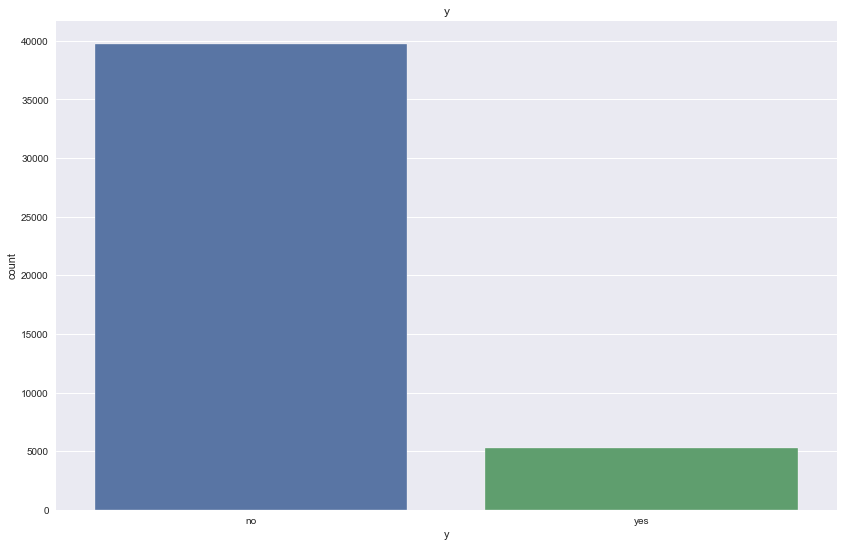

In [22]:
def plot_count():
    for col in cat_df.columns:
        print('\n',10*'***','Plot',col,10*'***')
        print(df[col].value_counts(normalize=True))
        plt.figure(figsize=(14,9))
        plt.title(col)
        sns.countplot(df[col])
        plt.show()
    
    
plot_count()

## Observation:
#### The class distribution in the target is 88% so it clearly indicates imbalnced dataset
#### Most of customeres married
#### Most of Employees are blue-collar
#### Most of customers education is secondary 
#### Most of customers dont have credit card
#### Most of customers having housing loans
#### Most of customers dont have personal loan
#### Most of customers contacted by cellular
#### Most of customers contacted by cellular

#### get numerical data separately

In [23]:
num_df = df.select_dtypes(include=np.number)
num_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [24]:
num_df.describe()

age        balance           day      duration      campaign  \
count  45000.000000   45000.000000  45000.000000  45000.000000  45000.000000   
mean      40.941044    1360.004667     15.802222    258.048244      2.761778   
std       10.621636    3040.556282      8.323657    257.477599      3.094970   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1424.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45000.000000  45000.000000  
mean      40.183533      0.579578  
std      100.093178      2.302618  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

## Outliers check


 ****************************** box Plot age ******************************


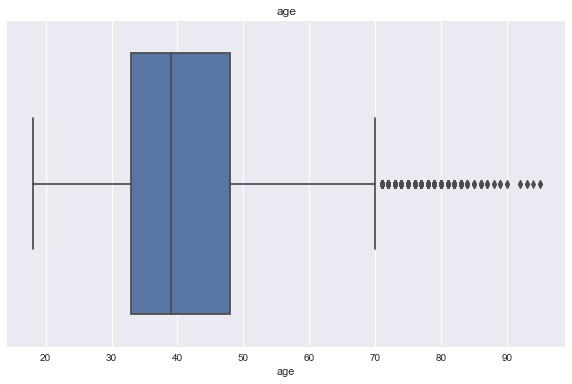


 ****************************** box Plot balance ******************************


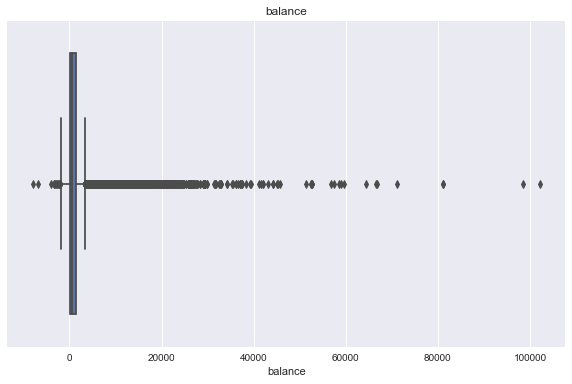


 ****************************** box Plot day ******************************


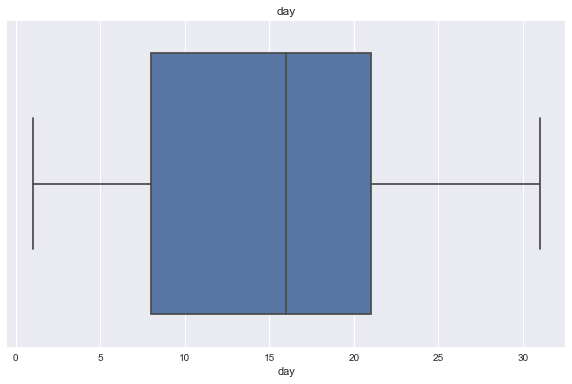


 ****************************** box Plot duration ******************************


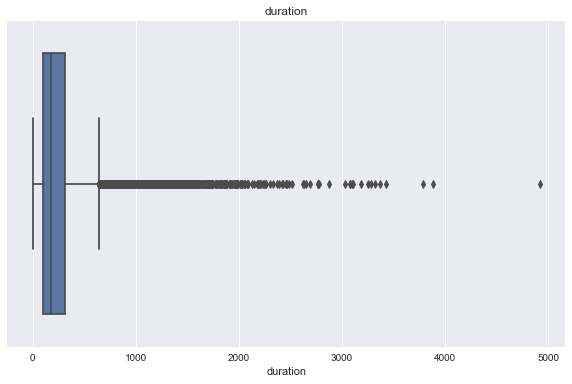


 ****************************** box Plot campaign ******************************


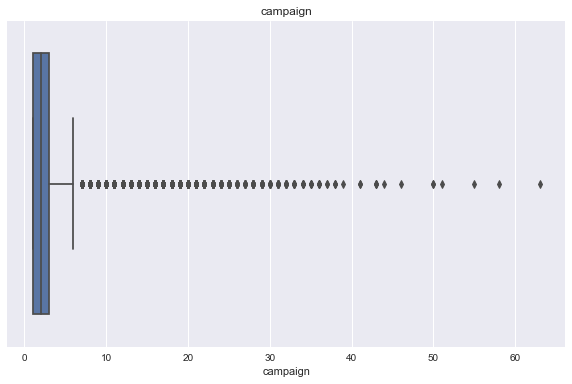


 ****************************** box Plot pdays ******************************


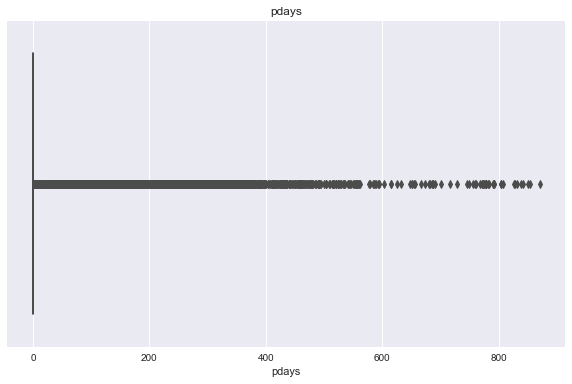


 ****************************** box Plot previous ******************************


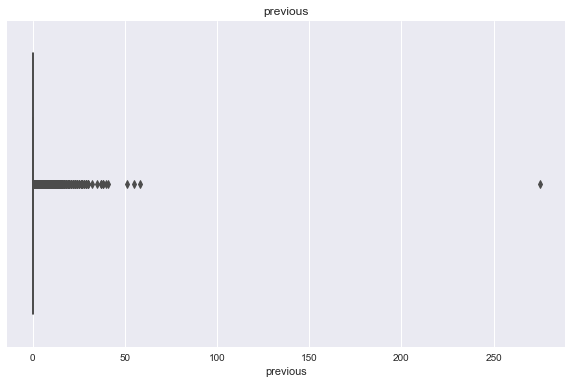

In [25]:
def plot_count():
    for col in num_df.columns:
        print('\n',10*'***','box Plot',col,10*'***')
        plt.figure(figsize=(10,6))
        plt.title(col)
        sns.boxplot(df[col])
        plt.show()
    
    
plot_count()

### Bivariate analysis : relationship b/w variables


 ****************************** Plot job ******************************


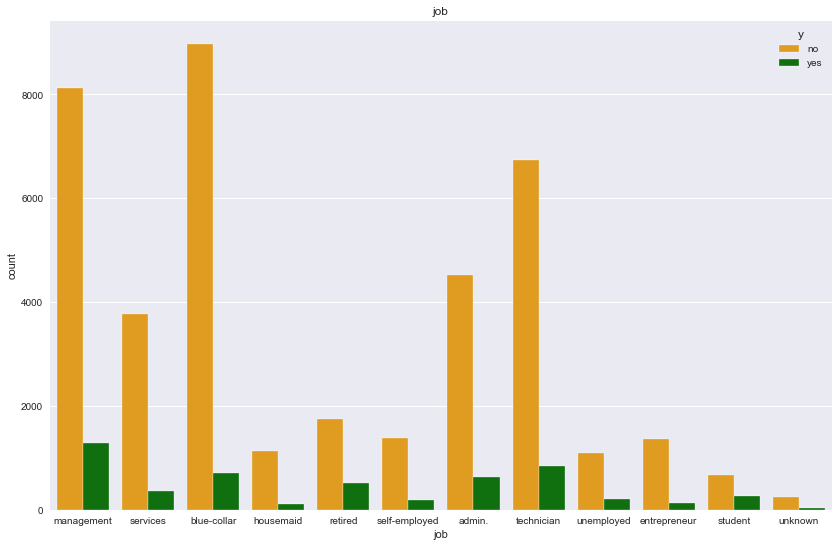


 ****************************** Plot marital ******************************


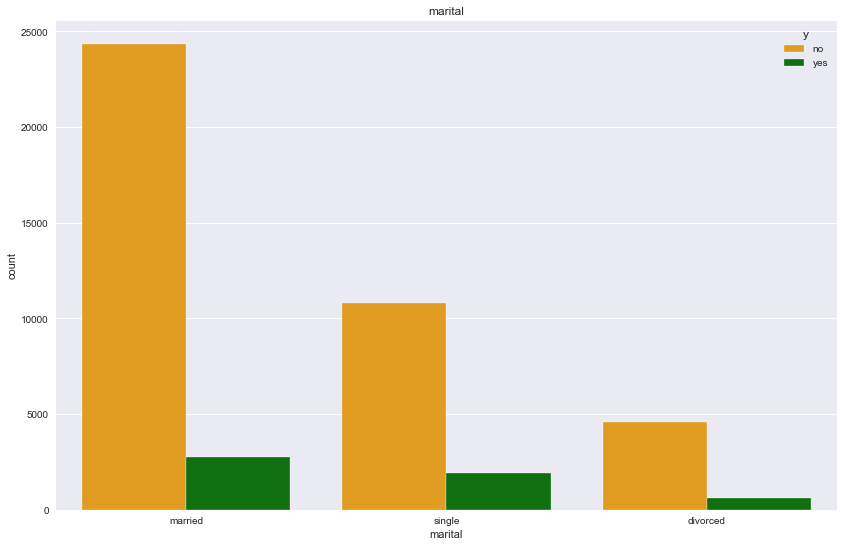


 ****************************** Plot education ******************************


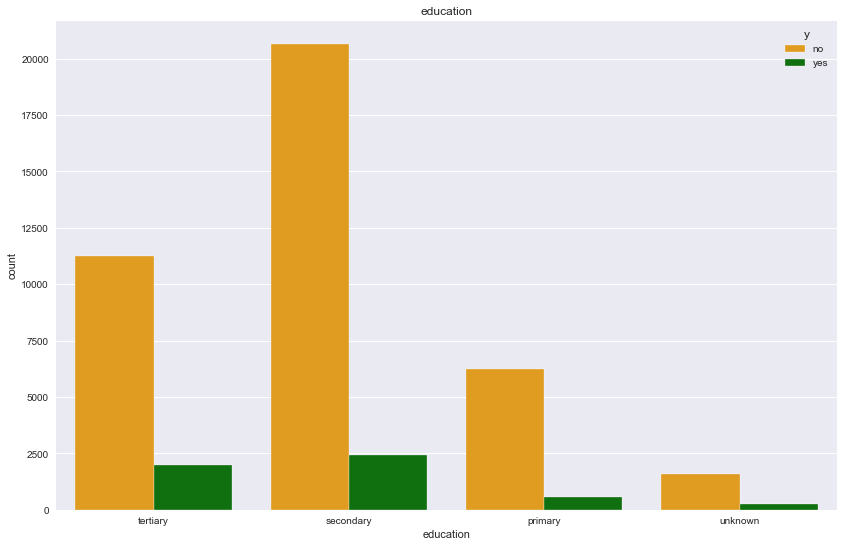


 ****************************** Plot default ******************************


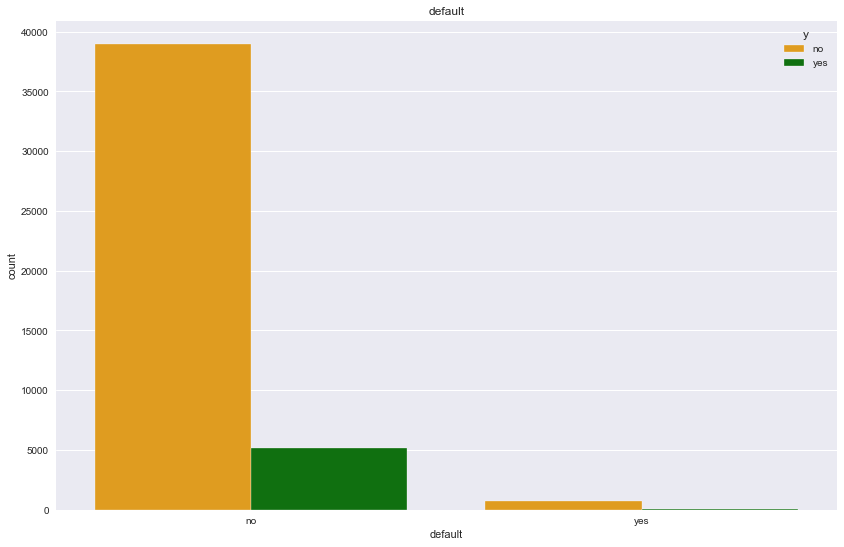


 ****************************** Plot housing ******************************


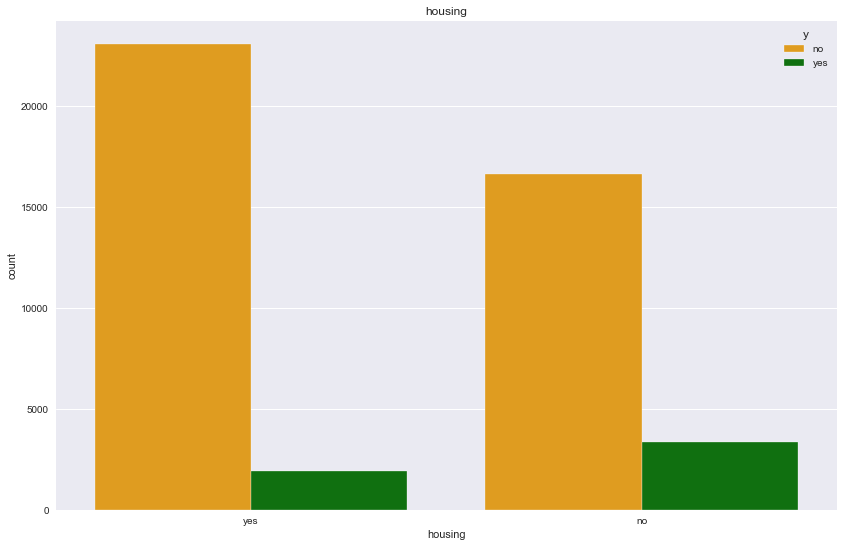


 ****************************** Plot loan ******************************


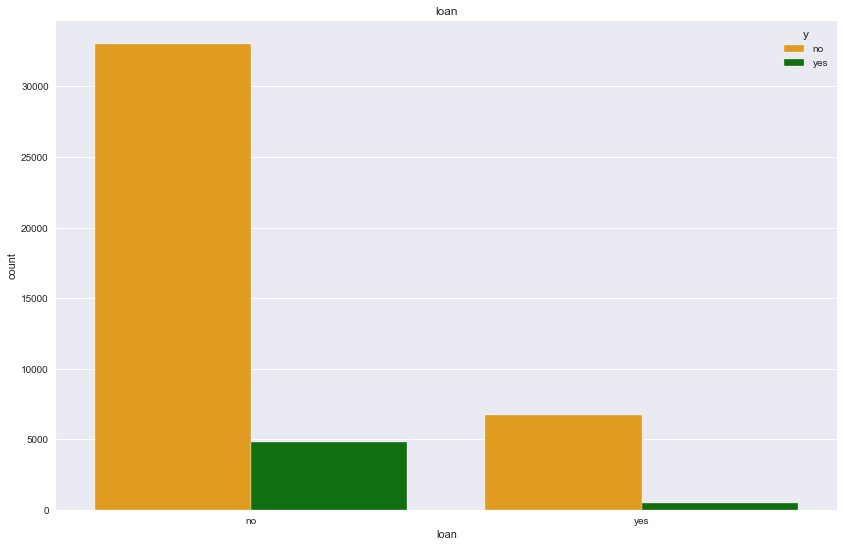


 ****************************** Plot contact ******************************


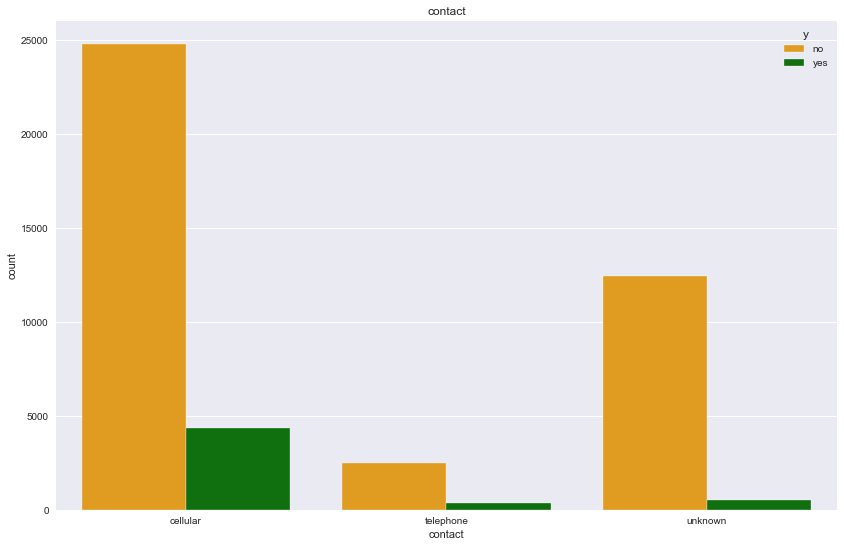


 ****************************** Plot month ******************************


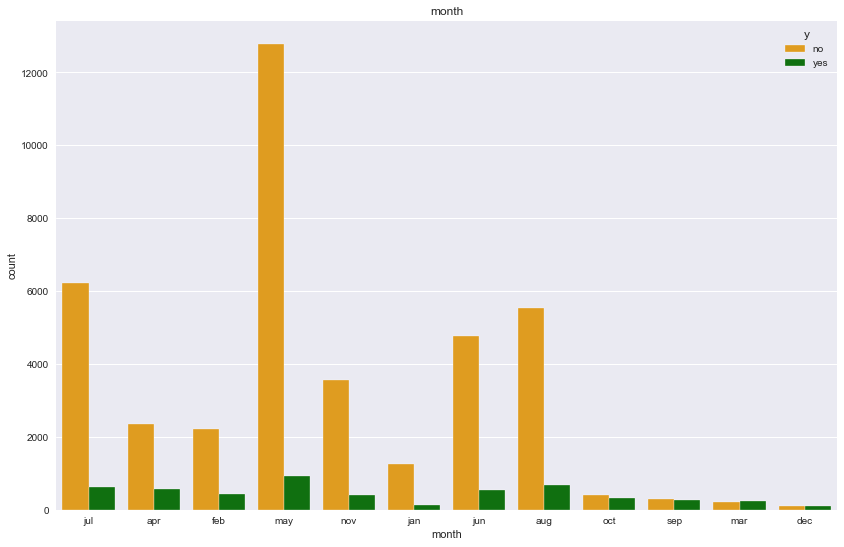


 ****************************** Plot poutcome ******************************


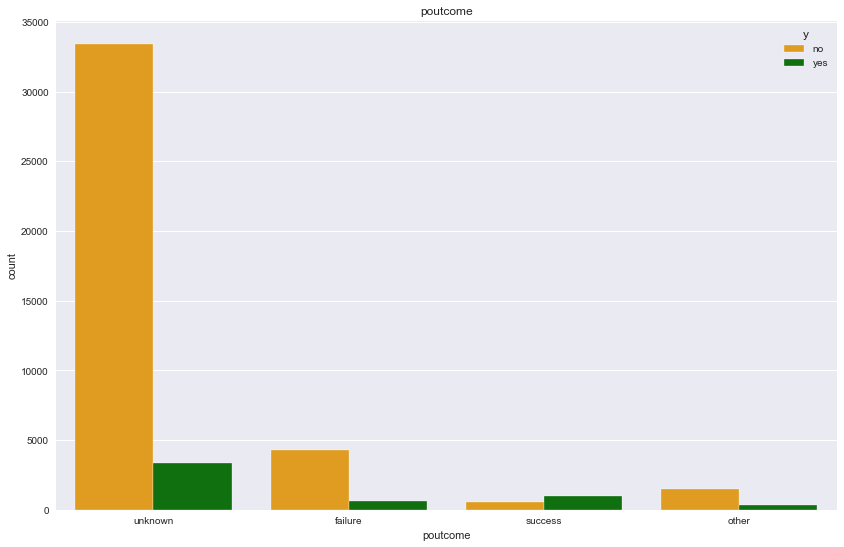

In [26]:
def bi_plot():
    for col in cat_df.columns[:-1]:
        print('\n',10*'***','Plot',col,10*'***')
        plt.figure(figsize=(14,9))
        plt.title(col)
        sns.countplot(x=df[col], hue=df['y'], palette=['orange','green'])
        plt.show()
    
    
bi_plot()    

## Observation:

#### * Management employees are having most subscriptions and unknown employee are having low subscriptions
#### * Married customers are having most subscriptions and divorced customers having low subcriptions
#### * Secondary Education customers are have more subscriptions and Unknown customers are having less subscriptions
#### * Customers who dont have credit card are having more subscriptions.
#### * Customers who dont have housing loans are having more subscriptions.
#### * Customers who dont have personal loans are having more subscriptions.
#### * Cellular contacted customers are having more subscriptions.
#### * April,May, june, july, Aug months are having high subscriptions.

## converting categorical to numerical using Encoding techniques

In [27]:
cat_df.head()

job  marital  education default housing loan  contact month  \
0    management  married   tertiary      no     yes   no  unknown   may   
1    technician   single  secondary      no     yes   no  unknown   may   
2  entrepreneur  married  secondary      no     yes  yes  unknown   may   
3   blue-collar  married    unknown      no     yes   no  unknown   may   
4       unknown   single    unknown      no      no   no  unknown   may   

  poutcome   y  
0  unknown  no  
1  unknown  no  
2  unknown  no  
3  unknown  no  
4  unknown  no

## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_df:
    df[col] = le.fit_transform(df[col])

In [29]:
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
14001   37    4        1          2        0     1403        1     0        0   
32046   36    7        2          1        0     -253        1     0        0   
13318   47    1        1          0        0     -406        0     1        1   
42991   57    3        1          0        0      501        1     1        0   
14237   33    1        1          1        1     -406        1     1        0   

       day  month  duration  campaign  pdays  previous  poutcome  y  
14001   10      5        91        15     -1         0         3  0  
32046   14      0      1073         1     -1         0         3  1  
13318    8      5       243         5     -1         0         3  0  
42991   11      3       105         7    188         2         0  0  
14237   14      5       332         2     -1         0         3  0

In [30]:
df.shape

(45000, 17)

In [31]:
df['y'].value_counts()

0    39738
1     5262
Name: y, dtype: int64

In [32]:
# Extracting independent and dependent variables
X = df.drop('y', axis=1)
y = df['y']

In [33]:
y.shape

(45000,)

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [35]:
X

array([[-0.37104344, -0.10401445, -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [-0.46519195,  0.81256197,  1.36878766, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [ 0.57044161, -1.02059087, -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       ...,
       [ 0.00555058, -0.10401445,  1.36878766, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [-0.18274643, -1.32611634, -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [ 3.48904526,  0.20151102, -1.91998615, ...,  1.40686942,
         0.18258643, -0.56625608]])

## Spliting the data into Trainset and Testset

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36000, 16)
(36000,)
(9000, 16)
(9000,)


## Model building 

## Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [39]:
LR_predict = LR.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
print(LR.score(X_train,y_train)*100)
print(LR.score(X_test,y_test)*100)
print('ROCAUC score:',roc_auc_score(y_test, LR_predict))
print(classification_report(y_test,LR_predict))

89.07777777777778
89.3111111111111
ROCAUC score: 0.5996425033797627
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7947
           1       0.62      0.22      0.32      1053

    accuracy                           0.89      9000
   macro avg       0.76      0.60      0.63      9000
weighted avg       0.87      0.89      0.87      9000



## Handling Imbalced using SMOTE technique

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [42]:
X_smote

array([[-0.37104344, -0.10401445, -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [-0.46519195,  0.81256197,  1.36878766, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [ 0.57044161, -1.02059087, -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       ...,
       [-1.19992555,  0.95872708,  1.36878766, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [-0.7700351 ,  1.5672902 , -0.27559925, ..., -0.41145652,
        -0.25170658,  0.44479512],
       [-0.30345423,  1.38913742,  1.36878766, ..., -0.41145652,
        -0.25170658,  0.44479512]])

In [43]:
y_smote.shape

(79476,)

In [44]:
y_smote.isnull().sum()

0

In [45]:
y_smote.value_counts()

1    39738
0    39738
Name: y, dtype: int64

## Spliting the data into Trainset and Testset

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 10)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63580, 16)
(15896, 16)
(63580,)
(15896,)


# LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [49]:
LR_predict = LR.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
print(LR.score(X_train,y_train)*100)
print(LR.score(X_test,y_test)*100)
print('ROCAUC score:',roc_auc_score(y_test, LR_predict))
print(classification_report(y_test,LR_predict))

81.36678200692042
81.15878208354303
ROCAUC score: 0.8115615149608992
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      7995
           1       0.81      0.81      0.81      7901

    accuracy                           0.81     15896
   macro avg       0.81      0.81      0.81     15896
weighted avg       0.81      0.81      0.81     15896



### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10,criterion='entropy')
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)

cm = confusion_matrix(y_test,DT_pred)
print(cm)
print('DT:','Train_accuracy:',DT.score(X_train,y_train)*100)
print('DT:','Test_accuracy:',DT.score(X_test,y_test)*100)
print(classification_report(y_test,DT_pred))


[[6943 1052]
 [ 924 6977]]
DT: Train_accuracy: 89.01541365209185
DT: Test_accuracy: 87.5691997986915
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7995
           1       0.87      0.88      0.88      7901

    accuracy                           0.88     15896
   macro avg       0.88      0.88      0.88     15896
weighted avg       0.88      0.88      0.88     15896



### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, max_features='sqrt')
RFC.fit(X_train,y_train)
RF_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test,RF_pred)
print(cm)
print('RFC:','Train_accuracy:',RFC.score(X_train,y_train)*100)
print('RFC:','Test_accuracy:',RFC.score(X_test,y_test)*100)
print(classification_report(y_test,RF_pred))

[[7435  560]
 [ 284 7617]]
RFC: Train_accuracy: 100.0
RFC: Test_accuracy: 94.69048817312532
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      7995
           1       0.93      0.96      0.95      7901

    accuracy                           0.95     15896
   macro avg       0.95      0.95      0.95     15896
weighted avg       0.95      0.95      0.95     15896



### Support vecor machine

In [53]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf',C=10)
SVM.fit(X_train,y_train)
SV_pred=SVM.predict(X_test)

cm = confusion_matrix(y_test,SV_pred)
print(cm)
print('SVM:','Train_accuracy:',SVM.score(X_train,y_train)*100)
print('SVM:','Test_accuracy:',SVM.score(X_test,y_test)*100)
print(classification_report(y_test,SV_pred))


[[6808 1187]
 [ 605 7296]]
SVM: Train_accuracy: 90.23592324630387
SVM: Test_accuracy: 88.72672370407649
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7995
           1       0.86      0.92      0.89      7901

    accuracy                           0.89     15896
   macro avg       0.89      0.89      0.89     15896
weighted avg       0.89      0.89      0.89     15896

Executing shutdown due to inactivity...


2020-11-04 13:09:51,468 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2020-11-04 13:09:57,595 - INFO     - Executing shutdown...
